In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("4-Algerian_forest_fires_dataset.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.isnull()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,False,False,False,False,False,False,False,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,False,False,False,False,False,False,False
244,False,False,False,False,False,False,False,False,False,False,False,False,False,False
245,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
df.drop(122,inplace=True)

In [7]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
df.loc[:123,"Region"]=0 #iki bölgeyi 1 ile 0 arasında ayırdık
df.loc[123:,"Region"]=1
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [9]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [10]:
df=df.dropna().reset_index(drop=True)#NaN satırları çıkarma işlemi

In [11]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [12]:
df.columns=df.columns.str.strip()#belirtilen işareti harfi cümleyi siler.

In [13]:
df["day"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [14]:
df[df["day"]=="day"]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [15]:
df.drop(122,inplace=True)

In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [17]:
df[["day","month","year","Temperature","RH","Ws"]]=df[["day","month","year","Temperature","RH","Ws"]].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), int64(6), object(8)
memory usage: 30.4+ KB


In [19]:
df[["Rain","FFMC","DMC","DC","ISI","BUI","FWI"]]=df[["Rain","FFMC","DMC","DC","ISI","BUI","FWI"]].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 30.4+ KB


In [21]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [22]:
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)

In [23]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

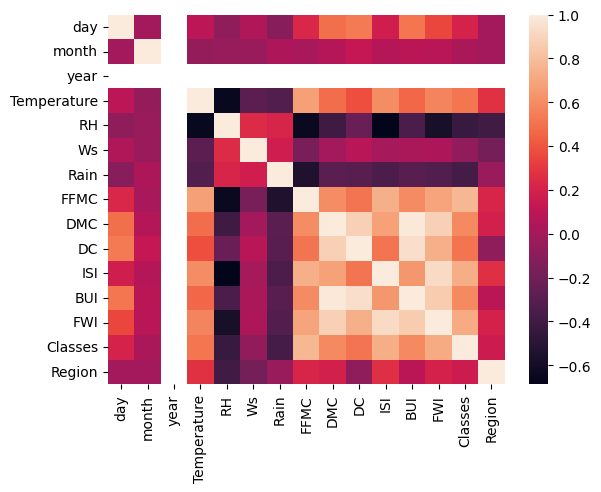

In [24]:
sns.heatmap(df.corr())
plt.show()

In [25]:
df.drop(["day","month","year"],axis=1,inplace=True) #veriye katkısı olmadığı için çıkardık
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [26]:
#depended& independe features
X=df.drop("FWI",axis=1)
y=df["FWI"]

In [27]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [30]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.644824,-0.322405,-0.222809,0.600615,0.483815,0.362859,0.579809,0.452819,0.463959,0.229479
RH,-0.644824,1.000000,0.205669,0.171031,-0.643767,-0.395535,-0.204568,-0.682107,-0.337032,-0.427947,-0.368402
Ws,-0.322405,0.205669,1.000000,0.152948,-0.135584,0.011874,0.104577,0.021616,0.051452,-0.044791,-0.181246
Rain,-0.222809,0.171031,0.152948,1.000000,-0.475600,-0.263007,-0.282983,-0.325552,-0.276457,-0.363013,0.049735
FFMC,0.600615,-0.643767,-0.135584,-0.475600,1.000000,0.592446,0.483610,0.732549,0.577031,0.770641,0.158505
DMC,0.483815,-0.395535,0.011874,-0.263007,0.592446,1.000000,0.871387,0.658793,0.980646,0.549624,0.153781
DC,0.362859,-0.204568,0.104577,-0.282983,0.483610,0.871387,1.000000,0.467977,0.939248,0.468011,-0.120874
ISI,0.579809,-0.682107,0.021616,-0.325552,0.732549,0.658793,0.467977,1.000000,0.617313,0.714801,0.241664
BUI,0.452819,-0.337032,0.051452,-0.276457,0.577031,0.980646,0.939248,0.617313,1.000000,0.550431,0.044453
Classes,0.463959,-0.427947,-0.044791,-0.363013,0.770641,0.549624,0.468011,0.714801,0.550431,1.000000,0.136752


In [31]:
#redundancy bilgi tekrarı, multicollinearity çoklu doğrusal bağıntı,overfitting

In [32]:
print(X_train.corr().iloc[0,2])

-0.32240526904978994


In [33]:
def correlation_for_dropping(df,threshold):
    columns_to_drop=set()
    corr=df.corr()
    for i in range (len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j])>threshold:
                columns_to_drop.add(corr.columns[i])
    return columns_to_drop
    #Bu Python fonksiyonu, veri setindeki yüksek derecede birbiriyle
    #ilişkili (multicollinear) sütunları tespit ederek temizlemene yardımcı olur.

In [34]:
columns_dropping=correlation_for_dropping(X_train,0.85) #Eğer iki sütun arasındaki mutlak korelasyon threshold
# (örnekte 0.85) değerinden büyükse,bu sütunlardan birini columns_to_drop kümesine ekler.

In [35]:
columns_dropping

{'BUI', 'DC'}

In [36]:
X_train.drop(columns_dropping,axis=1,inplace=True)
X_test.drop(columns_dropping,axis=1,inplace=True)


In [37]:
X_train.shape

(182, 9)

In [38]:
X_test.shape

(61, 9)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [44]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

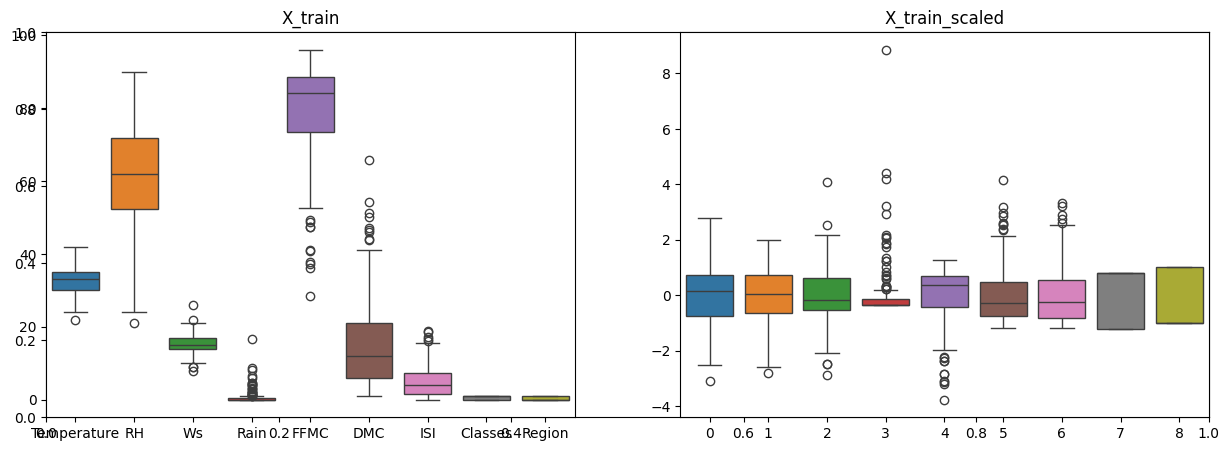

In [45]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train_scaled")
plt.show()

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Mean Absolute Error: 0.7036011729575921
Mean Squared Error: 0.8764163698605981
R2 Score: 0.9838729275348057


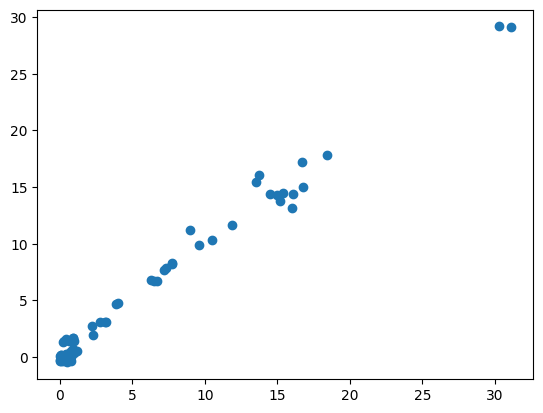

In [49]:
linear=LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred=linear.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

Mean Absolute Error: 1.2162726338006284
Mean Squared Error: 2.602937736813215
R2 Score: 0.9521029422229387


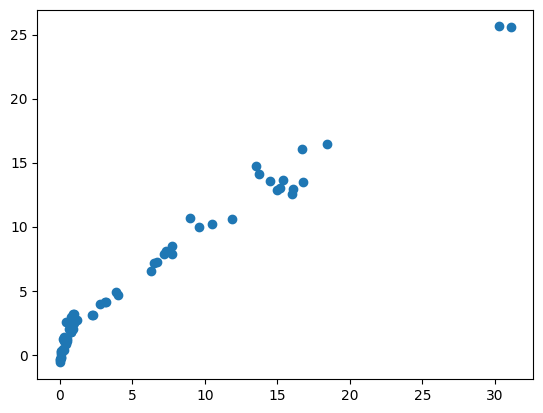

In [51]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

Mean Absolute Error: 0.7093542448703333
Mean Squared Error: 0.8868348464263109
R2 Score: 0.9836812155445575


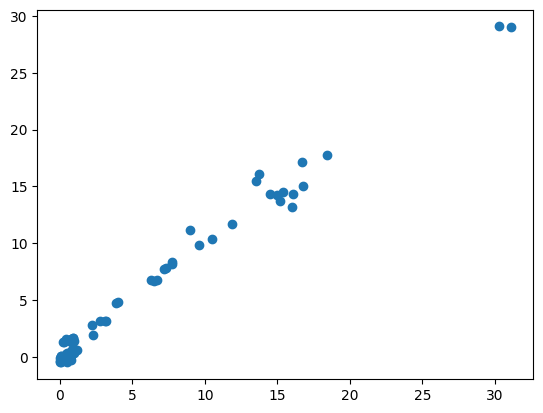

In [52]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

Mean Absolute Error: 1.7493286471090155
Mean Squared Error: 5.569160502382823
R2 Score: 0.8975210207375393


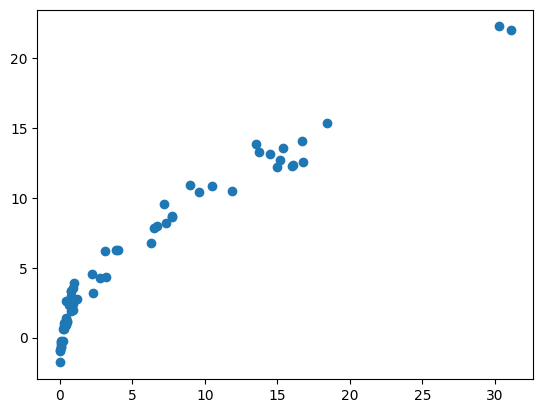

In [55]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

In [57]:
#lasso cross validation

In [59]:
from sklearn.linear_model import LassoCV

Mean Absolute Error: 0.7222308156305414
Mean Squared Error: 0.8972011670293625
R2 Score: 0.9834904632842026


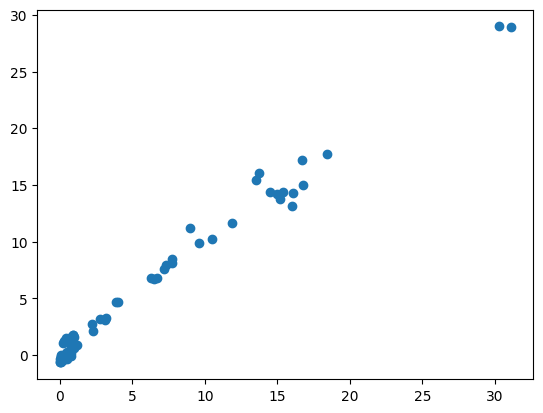

In [64]:
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred=lassocv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

In [65]:
lassocv.alpha_

np.float64(0.031548475118595085)

In [66]:
lassocv.alphas_

array([6.79691292, 6.33882374, 5.91160823, 5.51318562, 5.14161537,
       4.7950877 , 4.47191484, 4.17052274, 3.88944347, 3.627308  ,
       3.38283958, 3.15484751, 2.94222135, 2.74392548, 2.55899408,
       2.38652645, 2.22568255, 2.075679  , 1.93578518, 1.80531974,
       1.68364723, 1.57017504, 1.4643505 , 1.36565818, 1.27361739,
       1.18777984, 1.10772745, 1.03307033, 0.96344485, 0.89851189,
       0.83795519, 0.78147982, 0.72881069, 0.67969129, 0.63388237,
       0.59116082, 0.55131856, 0.51416154, 0.47950877, 0.44719148,
       0.41705227, 0.38894435, 0.3627308 , 0.33828396, 0.31548475,
       0.29422213, 0.27439255, 0.25589941, 0.23865264, 0.22256826,
       0.2075679 , 0.19357852, 0.18053197, 0.16836472, 0.1570175 ,
       0.14643505, 0.13656582, 0.12736174, 0.11877798, 0.11077275,
       0.10330703, 0.09634448, 0.08985119, 0.08379552, 0.07814798,
       0.07288107, 0.06796913, 0.06338824, 0.05911608, 0.05513186,
       0.05141615, 0.04795088, 0.04471915, 0.04170523, 0.03889

In [ ]:
#Ridge cross validation

Mean Absolute Error: 0.7093542448703333
Mean Squared Error: 0.8868348464263109
R2 Score: 0.9836812155445575


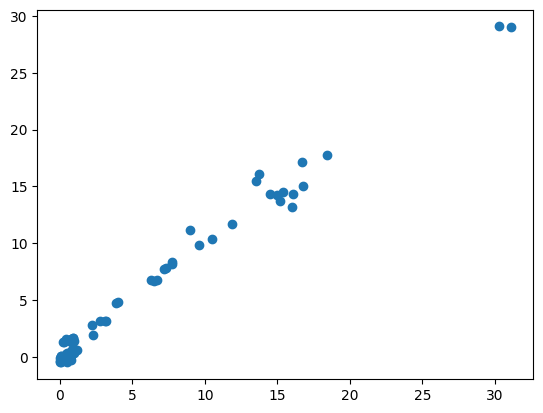

In [69]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

In [ ]:
#Elastic net cross validation

Mean Absolute Error: 0.7354284604918174
Mean Squared Error: 0.9249125778630375
R2 Score: 0.9829805413498388


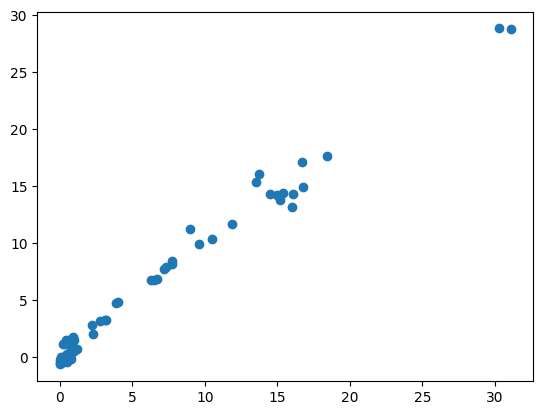

In [72]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv=ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled,y_train)
y_pred=elasticnetcv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

In [73]:
elasticnetcv.alpha_


np.float64(0.025472347707234465)

In [74]:
elasticnetcv.alphas_

array([13.59382584, 12.67764748, 11.82321647, 11.02637125, 10.28323073,
        9.5901754 ,  8.94382967,  8.34104549,  7.77888694,  7.25461599,
        6.76567915,  6.30969502,  5.8844427 ,  5.48785095,  5.11798817,
        4.77305289,  4.4513651 ,  4.15135799,  3.87157036,  3.61063947,
        3.36729446,  3.14035008,  2.928701  ,  2.73131635,  2.54723477,
        2.37555967,  2.2154549 ,  2.06614066,  1.92688969,  1.79702377,
        1.67591039,  1.56295964,  1.45762139,  1.35938258,  1.26776475,
        1.18232165,  1.10263712,  1.02832307,  0.95901754,  0.89438297,
        0.83410455,  0.77788869,  0.7254616 ,  0.67656792,  0.6309695 ,
        0.58844427,  0.5487851 ,  0.51179882,  0.47730529,  0.44513651,
        0.4151358 ,  0.38715704,  0.36106395,  0.33672945,  0.31403501,
        0.2928701 ,  0.27313164,  0.25472348,  0.23755597,  0.22154549,
        0.20661407,  0.19268897,  0.17970238,  0.16759104,  0.15629596,
        0.14576214,  0.13593826,  0.12677647,  0.11823216,  0.11

## Regression Desicion

In [79]:
# https://github.com/shankarpandala/lazypredict

In [80]:
!pip install lazypredict


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

In [82]:
diabetes  = datasets.load_diabetes()

In [84]:
type(diabetes)

sklearn.utils._bunch.Bunch

In [85]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [86]:
X, y = shuffle(diabetes.data, diabetes.target, random_state=13)
X = X.astype(np.float32)

In [87]:
offset = int(X.shape[0] * 0.9)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [88]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
#verbose yaptığı işlemleri tek tek gösterir
print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 397, number of used features: 10
[LightGBM] [Info] Start training from score 151.722922
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 